In [29]:
using Pkg
Pkg.activate(pwd())

  Activating project at `c:\Users\lilang\OneDrive\OneDrive - Danmarks Tekniske Universitet\Spine Model\Skive`


In [138]:
using GLMakie, CSV, DataFrames, Dates
GLMakie.activate!()

In [98]:
# using CairoMakie
# CairoMakie.activate!()

In [31]:
data_flows = CSV.read(".spinetoolbox\\items\\export-unit_flow\\output\\unit_flow.csv", DataFrame);
describe(data_flows)

Row,variable,mean,min,median,max,nmissing,eltype
,Symbol,Union…,Any,Any,Any,Int64,DataType
1,Parameter,,unit_flow,,unit_flow,0,String15
2,Unit,,ASU,,NH3_syn_10,0,String15
3,Node,,BESS,,Steam_out,0,String31
4,Direction,,from_node,,to_node,0,String15
5,Time,,2019-01-01T00:00:00,2019-07-01T00:00:00,2019-12-30T23:00:00,0,DateTime
6,Value,16.3883,-1.41754e-6,3.47203,185.314,0,Float64
7,Scenario,,Inv_H2_Local_1.0x_bin_15645319,,Inv_NH3_PPA_2.0x_cont_15645341,0,String


In [32]:
data_units = CSV.read(".spinetoolbox\\items\\export-units\\output\\units.csv", DataFrame);
describe(data_units)

Row,variable,mean,min,median,max,nmissing,eltype
,Symbol,Union…,Any,Any,Any,Int64,DataType
1,Parameter,,units_available,,units_started_up,0,String31
2,Unit,,ASU,,NH3_syn_10,0,String15
3,Time,,2019-01-01T00:00:00,2019-07-01T08:00:00,2019-12-30T23:00:00,0,DateTime
4,Value,26.2865,7.52704e-5,1.0,222.0,0,Float64
5,Scenario,,Inv_H2_Local_1.0x_bin_15645319,,Inv_NH3_PPA_2.0x_cont_15645341,0,String


In [33]:
data_nodes = CSV.read(".spinetoolbox\\items\\export-node\\output\\nodes.csv", DataFrame);
describe(data_nodes)

Row,variable,mean,min,median,max,nmissing,eltype
,Symbol,Union…,Any,Any,Any,Int64,DataType
1,Parameter,,node_injection,,storages_invested_available,0,String31
2,Node,,BESS,,Steam_out,0,String31
3,Time,,2019-01-01T00:00:00,2019-06-30T20:00:00,2019-12-30T23:00:00,0,DateTime
4,Value,6.59867,-17.9818,0.61125,185.314,0,Float64
5,Scenario,,Inv_H2_Local_1.0x_bin_15645319,,Inv_NH3_PPA_2.0x_cont_15645341,0,String


In [34]:
unique(data_nodes[!, :Parameter])

4-element Vector{String31}:
 "storages_invested_available"
 "node_injection"
 "storages_invested"
 "node_state"

In [35]:
unique(data_flows[!, :Parameter])

1-element Vector{String15}:
 "unit_flow"

In [36]:
flows = filter(:Parameter => n -> n == "unit_flow", data_flows);

In [37]:
# negative values for flows to nodes
flows[!, :Value] = flows[!, :Value] .* ((flows[!, :Direction] .== "to_node") .* (-2) .+ 1);

In [38]:
# rename synthesizers for multiple binary
flows_new = filter(:Unit => n -> contains(n, "syn_"), flows)
flows_new[!, :Unit] = chop.(flows_new[!, :Unit], tail=3)
# add to overall df, eliminate old
append!(flows, flows_new);
flows = filter(:Unit => n -> !contains(n, "syn_"), flows);

In [39]:
# construct synthesizer cap from binary variables
data_units_new = filter(:Unit => n -> contains(n, "syn_"), data_units)
data_units_new[!, :Value] = data_units_new[!, :Value] .* parse.(Int, map(s -> s[end-1:end], data_units_new[!, :Unit]))
data_units_new[!, :Unit] = chop.(data_units_new[!, :Unit], tail=3)
# add to overall df, eliminate old
append!(data_units, data_units_new);
data_units = filter(:Unit => n -> !contains(n, "syn_"), data_units);

In [40]:
us = sort!(unique(flows.Scenario))
@show us

us = ["Inv_H2_Local_1.0x_bin_15645319", "Inv_H2_Local_1.0x_cont_15645320", "Inv_H2_Local_1.5x_bin_15645321", "Inv_H2_Local_2.0x_bin_15645322", "Inv_H2_Local_2.0x_cont_15645323", "Inv_H2_PPA_1.0x_bin_15645324", "Inv_H2_PPA_1.0x_cont_15645325", "Inv_H2_PPA_1.5x_bin_15645326", "Inv_H2_PPA_2.0x_bin_15645327", "Inv_H2_PPA_2.0x_cont_15645328", "Inv_MeOH_PPA_1.0x_bin_15645329", "Inv_MeOH_PPA_1.0x_bin_opt_15645330", "Inv_MeOH_PPA_1.0x_cont_15645332", "Inv_MeOH_PPA_1.5x_bin_15645333", "Inv_MeOH_PPA_2.0x_bin_15645334", "Inv_MeOH_PPA_2.0x_cont_15645335", "Inv_NH3_PPA_1.0x_bin_15645336", "Inv_NH3_PPA_1.0x_bin_opt_15645337", "Inv_NH3_PPA_1.0x_cont_15645338", "Inv_NH3_PPA_1.5x_bin_15645339", "Inv_NH3_PPA_2.0x_bin_15645340", "Inv_NH3_PPA_2.0x_cont_15645341"]


22-element Vector{String}:
 "Inv_H2_Local_1.0x_bin_15645319"
 "Inv_H2_Local_1.0x_cont_15645320"
 "Inv_H2_Local_1.5x_bin_15645321"
 "Inv_H2_Local_2.0x_bin_15645322"
 "Inv_H2_Local_2.0x_cont_15645323"
 "Inv_H2_PPA_1.0x_bin_15645324"
 "Inv_H2_PPA_1.0x_cont_15645325"
 "Inv_H2_PPA_1.5x_bin_15645326"
 "Inv_H2_PPA_2.0x_bin_15645327"
 "Inv_H2_PPA_2.0x_cont_15645328"
 ⋮
 "Inv_MeOH_PPA_1.5x_bin_15645333"
 "Inv_MeOH_PPA_2.0x_bin_15645334"
 "Inv_MeOH_PPA_2.0x_cont_15645335"
 "Inv_NH3_PPA_1.0x_bin_15645336"
 "Inv_NH3_PPA_1.0x_bin_opt_15645337"
 "Inv_NH3_PPA_1.0x_cont_15645338"
 "Inv_NH3_PPA_1.5x_bin_15645339"
 "Inv_NH3_PPA_2.0x_bin_15645340"
 "Inv_NH3_PPA_2.0x_cont_15645341"

In [41]:
# Units
uu = sort!(unique(flows.Unit))
legend_u = ["El_curtail", "El_PPA_curtail", "El_wind", "El_wind_inv", "El_PV", "El_PV_inv", "BESS_charge", "BESS_discharge", "H2_syn",
            "H2_compress", "H2_decompress", "H2_discharge", "MeOH_syn", "NH3_syn", "ASU"];

# Add unique integer labels for units/scenarios
dict_u = Dict(legend_u .=> 1: length(legend_u));
dict_s = Dict(us .=> 1: length(us));

# for flows
flows[!, :Unit_int] = [dict_u[x] for x in flows.Unit];

# for units
data_units[!, :Unit_int] = [dict_u[x] for x in data_units.Unit];
data_units[!, :Scenario_int] = [dict_s[x] for x in data_units.Scenario];

# decide on according color
colors_u = [            
            :red1,              #El_curtail
            :red3,              #El_PPA_curtail
            :turquoise1,        #El_wind
            :turquoise3,        #El_wind_inv
            :gold1,             #El_PV
            :gold3,             #El_PV_inv
            :darkolivegreen1,   #BESS_charge
            :yellow3,           #BESS_discharge 
            :royalblue,         #H2_syn
            #:magenta3,          #El_mFRR_activation
            :steelblue4,        #H2_compress  
            :lightsteelblue1,   #H2_decompress  
            #:orchid,            #H2_convert_El
            :blue1,             #H2_discharge
            :darkorange1,       #MeOH_syn
            :purple4,           #NH3_syn
            :plum3,             #ASU
            ]

describe(flows)

Row,variable,mean,min,median,max,nmissing,eltype
,Symbol,Union…,Any,Any,Any,Int64,DataType
1,Parameter,,unit_flow,,unit_flow,0,String15
2,Unit,,ASU,,NH3_syn,0,String15
3,Node,,BESS,,Steam_out,0,String31
4,Direction,,from_node,,to_node,0,String15
5,Time,,2019-01-01T00:00:00,2019-07-01T00:00:00,2019-12-30T23:00:00,0,DateTime
6,Value,-2.33572,-185.314,-0.156563,185.314,0,Float64
7,Scenario,,Inv_H2_Local_1.0x_bin_15645319,,Inv_NH3_PPA_2.0x_cont_15645341,0,String
8,Unit_int,8.70912,1,9.0,15,0,Int64


In [42]:
# units invested in
uiu = unique!(filter(:Parameter => n -> contains(n, "invested_available"), data_units).Unit)
# nodes invested in
uin = unique!(filter(:Parameter => n -> contains(n, "invested_available"), data_nodes).Node)

2-element PooledArrays.PooledVector{String31, UInt32, Vector{UInt32}}:
 "BESS"
 "H2_storage"

In [43]:
unique(data_units[!, :Parameter])

6-element Vector{String31}:
 "units_started_up"
 "units_available"
 "units_invested"
 "units_shut_down"
 "units_on"
 "units_invested_available"

In [44]:
# Nodes
un = sort!(unique(flows[!, :Node]))
legend_n = ["El_curtailed", "El_PPA_curtailed", "El_renew", "BESS", "El_BESS", "El_PPA", "MeOH_out", "MEOH_out", "NH3_out", "H2", "H2_mFRR", "H2_storage", 
            "H2_decompressed",  "H2_out", "CO2_in", "H2O_in", "H2O_out", "Heat_out", "Steam_out", "N", "O_out"]
# Add unique integer labels for nodes
dict_n = Dict(legend_n .=> 1: length(legend_n));

# for flows
flows[!, :Node_int] = [dict_n[x] for x in flows.Node];

# for nodes
data_nodes[!, :Node_int] = [dict_n[x] for x in data_nodes.Node];
colors_n = [
            :red1,              #El_curtailed
            :red3,              #El_PPA_curtailed
            :aquamarine1,       #El_renew
            :darkolivegreen1,   #BESS
            :olive,             #El_BESS
            :aquamarine3,       #El_PPA
            #:orchid,            #El_mFRR
            #:magenta3,          #El_mFRR_out
            #:grey40,            #El_other
            :darkorange1,       #MeOH_out
            :darkorange1,       #MEOH_out   delete later
            :purple4,           #NH3_out
            :royalblue3,        #H2
            :mediumpurple2,     #H2_mFRR
            :steelblue4,        #H2_storage 
            :royalblue1,        #H2_decompressed
            :blue1,             #H2_out 
            :navajowhite3,      #CO2_in
            :slategray1,        #H2O_in 
            :slategray3,        #H2O_out
            :lightcoral,        #Heat_out   
            :coral3,            #Steam_out 
            :honeydew3,         #N
            :antiquewhite, ]    #O_out
describe(flows)

Row,variable,mean,min,median,max,nmissing,eltype
,Symbol,Union…,Any,Any,Any,Int64,DataType
1,Parameter,,unit_flow,,unit_flow,0,String15
2,Unit,,ASU,,NH3_syn,0,String15
3,Node,,BESS,,Steam_out,0,String31
4,Direction,,from_node,,to_node,0,String15
5,Time,,2019-01-01T00:00:00,2019-07-01T00:00:00,2019-12-30T23:00:00,0,DateTime
6,Value,-2.33572,-185.314,-0.156563,185.314,0,Float64
7,Scenario,,Inv_H2_Local_1.0x_bin_15645319,,Inv_NH3_PPA_2.0x_cont_15645341,0,String
8,Unit_int,8.70912,1,9.0,15,0,Int64
9,Node_int,10.0401,1,10.0,21,0,Int64


In [45]:
flow_hourly = flows[:, [:Unit, :Unit_int, :Node, :Node_int, :Scenario, :Time, :Value]]
first(flow_hourly,5)

Row,Unit,Unit_int,Node,Node_int,Scenario,Time,Value
,String15,Int64,String31,Int64,String,DateTime,Float64
1,H2_compress,10,El_BESS,5,Inv_H2_Local_2.0x_bin_15645322,2019-01-01T05:00:00,0.0237605
2,H2_compress,10,El_BESS,5,Inv_H2_Local_2.0x_bin_15645322,2019-01-01T17:00:00,0.00475248
3,H2_compress,10,El_BESS,5,Inv_H2_Local_2.0x_bin_15645322,2019-01-02T08:00:00,0.00475248
4,H2_compress,10,El_BESS,5,Inv_H2_Local_2.0x_bin_15645322,2019-01-02T10:00:00,0.00475248
5,H2_compress,10,El_BESS,5,Inv_H2_Local_2.0x_bin_15645322,2019-01-05T11:00:00,0.028512


In [46]:
flow_year = groupby(flows, [:Unit, :Unit_int, :Node, :Node_int, :Scenario])
flow_year = combine(flow_year, :Value => sum)
rename!(flow_year,:Value_sum => :Value)
first(flow_year,3)

Row,Unit,Unit_int,Node,Node_int,Scenario,Value
,String15,Int64,String31,Int64,String,Float64
1,H2_compress,10,El_BESS,5,Inv_H2_Local_2.0x_bin_15645322,4.74178
2,H2_compress,10,El_BESS,5,Inv_H2_Local_1.5x_bin_15645321,10.1098
3,H2_compress,10,El_BESS,5,Inv_H2_PPA_2.0x_bin_15645327,23.6909


In [47]:
# Filter functions
function select_scenario(data::DataFrame, scenario::AbstractString)
    return filter(:Scenario => ==(scenario), data);
end

function select_hour(data_hourly::DataFrame, scenario::AbstractString, hour::DateTime)
    scenario_data = filter(:Scenario => ==(scenario), data_hourly);
    return filter(:Time => ==(hour), scenario_data);
end

function select_day(data_hourly::DataFrame, scenario::AbstractString, days::DateTime)
    scenario_data = filter(:Scenario => ==(scenario), data_hourly);
    return filter(:Time => x -> Date(x) == Date(days), scenario_data)
end

select_day (generic function with 1 method)

In [48]:
function add_menu()
    menu = Menu(fig,
                options = us,
                default = us[1],
                direction=:down
    )

    fig[1,1] = vgrid!(
    Label(fig, "Scenario", width = nothing),
    menu;
    tellheight = false, width=350
    )
  return menu
end

add_menu (generic function with 1 method)

In [49]:
# Slider Hour
function add_slider_hour(data_hourly::DataFrame)
    starttime = minimum(data_hourly.Time)
    endtime = maximum(data_hourly.Time)
    slid = Slider(fig[1,1], range = range(starttime, endtime, step=Hour(1)), startvalue=starttime)

    fig[3,2:3] = hgrid!(
        Label(fig, "Hour:", height = nothing),
        slid;
        #Label(fig, Dates.format(hour_obs, "yyyy-mm-dd HH"));
        tellweight = false, width=600
    )

    return slid
end

add_slider_hour (generic function with 1 method)

In [50]:
# Slider day
function add_slider_day(data_hourly::DataFrame)
    starttime = day(minimum(data_hourly.Time))
    endtime = day(maximum(data_hourly.Time))
    slid = Slider(fig[1,1], range = range(starttime, endtime, step=Day(1)), startvalue=starttime)

    fig[3,2] = hgrid!(
        Label(fig, "Day:", height = nothing),
        slid;
        #Label(fig, Dates.format(hour_obs, "yyyy-mm-dd HH"));
        tellweight = false, width=600
    )

    return slid
end

add_slider_day (generic function with 1 method)

In [51]:
function plot_units_to_nodes(fig_pos::GridPosition, df_data::Observable; legend=false, legend_pos=fig[2,1], title="Year") 
    colors = cgrad(colors_n)
    ax = Axis(fig_pos; xticks = (1:length(legend_u), legend_u),
                        xticklabelrotation = pi/6, xlabel = "Units",
                        title = title,
                        yscale = Makie.pseudolog10,
    )
    points = @lift(Point2f.(convert(Vector{Float32}, sort!($df_data, :Node_int, rev=true).Unit_int), sort!($df_data,  :Node_int, rev=true).Value))

    plt = barplot!(ax, points;
            stack=repeat(1:length(legend_n), outer=length(legend_u)),
            color=@lift(colors[$df_data.Node_int]),
            #colormap = :tab20,
            #colorrange = (1, length(un)),
            width=1, 
    )
    
    # Limits
    value_max = @lift(maximum([sum((last.($points)[d] for d in 1:length($df_data.Value) 
                        if first.($points)[d] == unique($df_data.Unit_int)[n] && last.($points)[d] > 0), init = 0) for n in 1:length(unique($df_data.Unit_int))], init = 0.01));

    value_min = @lift(minimum([sum((last.($points)[d] for d in 1:length($df_data.Value)
                        if first.($points)[d] == unique($df_data.Unit_int)[n] && last.($points)[d] < 0), init = 0) for n in 1:length(unique($df_data.Unit_int))], init = 0));

    @lift(limits!(ax, 0, length(legend_u)+1, minimum([1.5*$value_min, -50]), maximum([1.5*$value_max, 50])))
    
    if legend == true
        # Legend
        title = "Nodes"
        Legend(legend_pos, [PolyElement(polycolor = colors[i]) for i in 1:length(legend_n)], [legend_n[i] for i in 1:length(legend_n)], title, nbanks=2)
        #@lift(Legend(fig[1,3], [PolyElement(polycolor = colors[i]) for i in unique($df_data.Node_int)], [un[i] for i in (unique($df_data.Node_int))], title))
    end    
    return fig, ax, plt
end

plot_units_to_nodes (generic function with 1 method)

In [52]:
function plot_nodes_to_units(fig_pos::GridPosition, df_data::Observable, source::String; legend=false, legend_pos=fig[2,1], title="", RES=true, ymin=50, storage_data=nothing) 
    #colors = cgrad(colors_u)
    ax = Axis(fig_pos; xticks = 0:23,
                        xticklabelrotation = pi/3, xlabel = "Time", xticklabelsize=12,
                        title = title
    )
    # # Renew el bars
    Renew_data = @lift(filter([:Node, :Value] => (x,y) -> x == source && y > 0, sort!($df_data, [:Time, :Unit_int],rev=[false, true])))
    Renew_points = @lift(Point2f.(convert(Vector{Float32}, hour.($Renew_data.Time)), $Renew_data.Value))

    plt = barplot!(ax, Renew_points;
                    stack= repeat(1:length(legend_u), outer=24),  #@lift($Renew_data.Unit_int),
                    color=@lift(cgrad(colors_u)[$Renew_data.Unit_int]),
    )

    if RES == true
        if source == "El_renew" wind="El_wind"; PV = "El_PV" elseif source == "El_PPA" wind="El_wind_inv"; PV = "El_PV_inv" end
        # Wind line
        Wind_data = @lift(filter(:Unit =>==("wind"), $df_data))
        Wind_points = @lift(Point2f.(convert(Vector{Float32}, hour.($Wind_data.Time)), -$Wind_data.Value))
        plt = scatter!(ax, Wind_points; linewidth=5, color=:turquoise1, marker='≈', markersize=25
        )
        # # PV line
        PV_data = @lift(filter(:Unit =>==("PV"), $df_data))
        PV_points = @lift(Point2f.(convert(Vector{Float32}, hour.($PV_data.Time)), -$PV_data.Value))
        plt = scatter!(ax, PV_points; linewidth=5, color=:gold1, marker=:star8
        )
    end

    # Hydrogen storage state
    if storage_data != nothing
        H2_data = @lift(filter([:Node, :Parameter] => (x,y) -> x == "H2_storage" && y == "node_state", $storage_data))
        H2_points = @lift(Point2f.(convert(Vector{Float32}, hour.($H2_data.Time)), $H2_data.Value))
        plt = scatterlines!(ax, H2_points; linewidth=5, markercolor=:steelblue4, strokecolor=:royalblue, 
        color =:royalblue #, marker=:star8)
        )
    end
    
    # Axis limits
    value_max = @lift(maximum([sum((last.($Renew_points)[d] for d in 1:length($Renew_points) 
                        if first.($Renew_points)[d] == n), init = 0) for n in 0:23], init=0.01));

    @lift(limits!(ax, 0, 23, 0, maximum([1.05*$value_max, ymin])))
    
    if legend == true
        # Legend
         title = "Units"
         Legend(legend_pos, [PolyElement(polycolor = cgrad(colors_u)[i]) for i in 1:length(legend_u)], 
                [legend_u[i] for i in 1:length(legend_u)], title, nbanks=2)
        #@lift(Legend(fig[1,3], [PolyElement(polycolor = colors[i]) for i in unique($df_data.Node_int)], [un[i] for i in (unique($df_data.Node_int))], title))
    end    
    return fig, ax, plt
end

plot_nodes_to_units (generic function with 1 method)

In [144]:
function plot_units_var(fig_pos::GridPosition, df_data::Observable; legend=false, legend_pos=fig[2,1], title="Year") 
    colors = cgrad(colors_u)
    ax = Axis(fig_pos; xticks = ([dict_u[x] for x in uiu], uiu),
                        xticklabelrotation = pi/3, xlabel = "Units",
                        title = title,
                        yscale = Makie.pseudolog10,
                        xticklabelsize=12,
    )

    Unit_data = @lift(filter(:Parameter => x -> contains(x, "invested_available"), $df_data))
    points = @lift(Point2f.(convert(Vector{Float32}, $Unit_data.Unit_int), $Unit_data.Value))

    plt = barplot!(ax, points;
            #stack=repeat(1:length(legend_n), outer=length(legend_u)),
            color=@lift(colors[$Unit_data.Unit_int]),
            #bar_labels= :y, #nothing,#@lift(round.($Unit_data.Value, digits=2)),
            #colormap = :tab20,
            #colorrange = (1, length(un)),
            width=1, 
    )

    text!(ax, points, text=@lift(string.(round.($Unit_data.Value, digits=2))))
    
    # Limits
    # value_max = @lift(maximum([sum((last.($points)[d] for d in 1:length($df_data.Value) 
    #                     if first.($points)[d] == unique($df_data.Unit_int)[n] && last.($points)[d] > 0), init = 0) for n in 1:length(unique($df_data.Unit_int))], init = 0.01));

    # value_min = @lift(minimum([sum((last.($points)[d] for d in 1:length($df_data.Value)
    #                     if first.($points)[d] == unique($df_data.Unit_int)[n] && last.($points)[d] < 0), init = 0) for n in 1:length(unique($df_data.Unit_int))], init = 0));

    @lift(limits!(ax, 0, length(legend_u)+2, 0, 1.7*maximum(vcat(0.0001, $Unit_data.Value))))
    plt.bar_labels=@lift(round.($Unit_data.Value, digits=2))
    
    if legend == true
        # Legend
        title = "Nodes"
        Legend(legend_pos, [PolyElement(polycolor = colors[i]) for i in 1:length(legend_u)], [legend_u[i] for i in 1:length(legend_u)], title, nbanks=2)
        #@lift(Legend(fig[1,3], [PolyElement(polycolor = colors[i]) for i in unique($df_data.Node_int)], [un[i] for i in (unique($df_data.Node_int))], title))
    end    
    return fig, ax, plt
end

plot_units_var (generic function with 1 method)

In [54]:
function plot_nodes_var(fig_pos::GridPosition, df_data::Observable; legend=false, legend_pos=fig[2,1], title="Year") 
    colors = cgrad(colors_n)
    ax = Axis(fig_pos; xticks = ([dict_n[x] for x in uin], uin),
                        xticklabelrotation = pi/3, xlabel = "Units",
                        title = title,
                        yscale = Makie.pseudolog10,
                        xticklabelsize=12,
    )

    Nodes_data = @lift(filter(:Parameter => x -> contains(x, "invested_available"), $df_data))
    points = @lift(Point2f.(convert(Vector{Float32}, $Nodes_data.Node_int), $Nodes_data.Value))

    plt = barplot!(ax, points;
            #stack=repeat(1:length(legend_n), outer=length(legend_u)),
            color=@lift(colors[$Nodes_data.Node_int]),
            #bar_labels= :y, #nothing,#@lift(round.($Nodes_data.Value, digits=2)),
            #colormap = :tab20,
            #colorrange = (1, length(un)),
            width=1, 
    )

    text!(ax, points, text=@lift(string.(round.($Nodes_data.Value, digits=2))))
    
    # Limits
    # value_max = @lift(maximum([sum((last.($points)[d] for d in 1:length($df_data.Value) 
    #                     if first.($points)[d] == unique($df_data.Unit_int)[n] && last.($points)[d] > 0), init = 0) for n in 1:length(unique($df_data.Unit_int))], init = 0.01));

    # value_min = @lift(minimum([sum((last.($points)[d] for d in 1:length($df_data.Value)
    #                     if first.($points)[d] == unique($df_data.Unit_int)[n] && last.($points)[d] < 0), init = 0) for n in 1:length(unique($df_data.Unit_int))], init = 0));

    @lift(limits!(ax, 0, length(legend_u)+2, 0, 1.7*maximum(vcat(0.0001,$Nodes_data.Value))))
    plt.bar_labels=@lift(round.($Nodes_data.Value, digits=2))
    
    if legend == true
        # Legend
        title = "Nodes"
        Legend(legend_pos, [PolyElement(polycolor = colors[i]) for i in 1:length(legend_n)], [legend_n[i] for i in 1:length(legend_n)], title, nbanks=2)
        #@lift(Legend(fig[1,3], [PolyElement(polycolor = colors[i]) for i in unique($df_data.Node_int)], [un[i] for i in (unique($df_data.Node_int))], title))
    end    
    return fig, ax, plt
end

plot_nodes_var (generic function with 1 method)

In [145]:
fig = Figure(resolution=(2000,1200)) 

scenario_obs = Observable(us[1])
hour_obs = Observable(DateTime(2019,01,01,01,0,0))
flow_year_df_obs = @lift(select_scenario(flow_year, $scenario_obs))
flow_day_df_obs = @lift(select_day(flow_hourly, $scenario_obs, $hour_obs))
flow_hour_df_obs = @lift(select_hour(flow_hourly, $scenario_obs, $hour_obs))
units_year_df_obs = @lift(select_scenario(data_units, $scenario_obs))
nodes_year_df_obs = @lift(select_scenario(data_nodes, $scenario_obs))
nodes_day_df_obs = @lift(select_day(data_nodes, $scenario_obs, $hour_obs))

menu = add_menu()
slider = add_slider_hour(flow_hourly)

fig, ax, plt = plot_units_to_nodes(fig[1,2:3], flow_year_df_obs,   title="Input/Output Flows per Unit per Year", legend=true) 
fig, ax2, plt2 = plot_units_to_nodes(fig[2,2:3], flow_hour_df_obs, title="Input/Output Flows per Unit per Hour")
fig, ax3, plt3 = plot_nodes_to_units(fig[4,2], flow_day_df_obs, "El_renew", title="On-site RES to Units", legend=true, legend_pos=fig[4,1])
fig, ax4, plt4 = plot_nodes_to_units(fig[4,3], flow_day_df_obs, "El_PPA", title="PPA Electricity to Units", legend=false)
fig, ax5, plt5 = plot_nodes_to_units(fig[4,4], flow_day_df_obs, "H2", title="Hydrogen to Units/Storage", legend=false, RES=false, ymin=2, storage_data=nodes_day_df_obs)
fig, ax6, plt6 = plot_units_var(fig[1,4], units_year_df_obs,   title="Investments per Unit", legend=false) 
fig, ax7, plt7 = plot_nodes_var(fig[2,4], nodes_year_df_obs,   title="Investments per Node", legend=false) 


on(menu.selection) do select
    scenario_obs[] = select
end

 on(slider.value) do val
     hour_obs[] = val
     ax2.title = "Input/Output Flows per Unit on $(Dates.format(val, "yyyy-mm-dd HH"))h" #$(val)"
     ax3.title = "On-site RES to Units on $(Dates.format(val, "yyyy-mm-dd"))" #$(val)"
     ax4.title = "PPA Electricity to Units on $(Dates.format(val, "yyyy-mm-dd"))" #$(val)"
     ax5.title = "Hydrogen to Units/Storage on $(Dates.format(val, "yyyy-mm-dd"))" #$(val)"
 end

display(fig)

GLMakie.Screen(...)

In [165]:
# use CairoMakie for pdf
save("pics/MeOH_H2-storage-0-opt.png", fig)

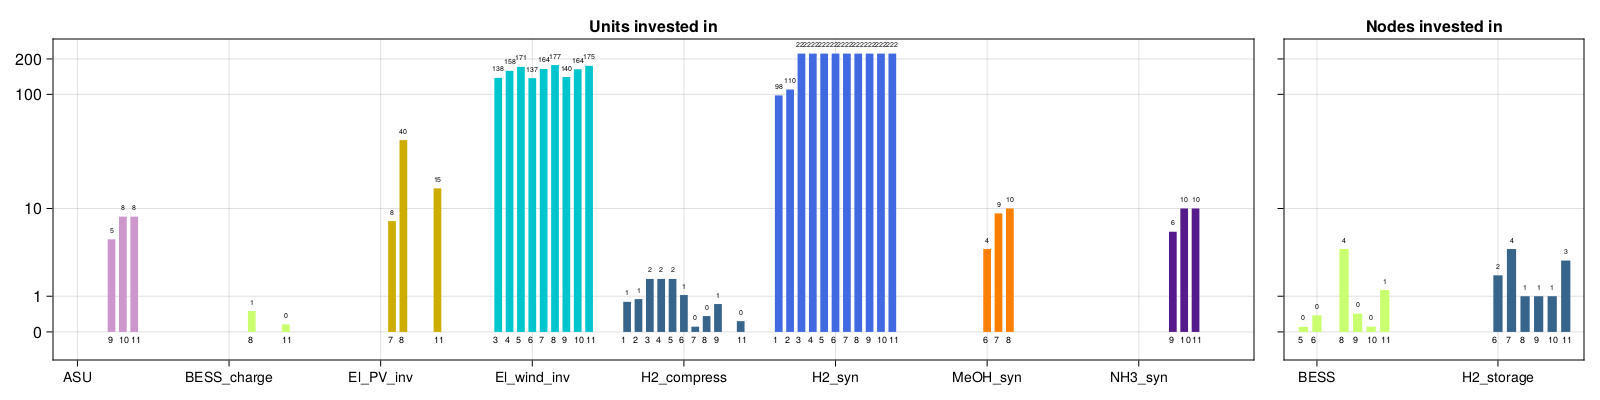

In [135]:
fig2 = Figure(resolution=(1600,400)) 
colorsu = cgrad(colors_u)
colorsn = cgrad(colors_n)
Unit_data = 
filter([:Parameter, :Value, :Scenario] => (x,y,z) -> contains(x, "invested_available") && y > 0.1 
                                                        && !contains(z, "opt") && contains(z, "bin") , data_units)

Node_data = 
filter([:Parameter, :Value, :Scenario] => (x,y,z) -> contains(x, "invested_available") && y > 0.1 
                                                        && !contains(z, "opt") && contains(z, "bin") , data_nodes)


# Scenarios box
us_short = sort!(unique(Unit_data.Scenario))
dict_s = Dict(us_short .=> 1: length(us_short));
Unit_data[!, :Scenario_int] = [dict_s[x] for x in Unit_data.Scenario];
Node_data[!, :Scenario_int] = [dict_s[x] for x in Node_data.Scenario];

# fig2[1,1] = vgrid!(
#         Label(fig2[1,1], "Scenarios", fontsize=16, font = :bold),
#         hgrid!(
#         Label(fig2[1,1], join(collect(1:length(us_short)), "\n"), width = nothing, justification = :left, font = :bold, fontsize=14,
#         lineheight = 1.5),
#         Label(fig2[1,1], join(chop.(us_short, tail=13), "\n"), justification = :left, fontsize=14,
#         lineheight = 1.5));
#         tellheight = false, width=170
# )

# Units invested in 
uiu_short = sort!(unique(Unit_data.Unit))
dict_ui = Dict(uiu_short .=> 1: length(uiu_short));
Unit_data[!, :Unit_int_i] = [dict_ui[x] for x in Unit_data.Unit];

ax1 = Axis(fig2[1,1]; xticks = ([dict_ui[x] for x in uiu_short], uiu_short),
                        yticks = ([0, 1, 10, 100, 200]),
                        # xlabel = "Units",
                        title = "Units invested in",
                        yscale = Makie.pseudolog10,
                        xticklabelsize=14,
)

upoints = Point2f.(convert(Vector{Float32}, Unit_data.Unit_int_i), Unit_data.Value)
plt = barplot!(ax1, upoints;
        dodge = Unit_data.Scenario_int,
        color=colorsu[Unit_data.Unit_int],
        bar_labels= convert.(Int, round.(Unit_data.Value, digits=0)),
        width=1, 
        label_size = 7,
)

text!(ax1, Point2f.(first.(upoints) + (0.84/length(us_short)) .*(Unit_data.Scenario_int .-length(us_short)/1.72), 
        zeros(length(upoints)) .- .3) , text=string.(convert.(Int, round.(Unit_data.Scenario_int, digits=0))), fontsize=9
)

# Nodes invested in 
uin_short = sort!(unique(Node_data.Node))
dict_ni = Dict(uin_short .=> 1: length(uin_short));
Node_data[!, :Node_int_i] = [dict_ni[x] for x in Node_data.Node];

ax2 = Axis(fig2[1,2]; xticks = ([dict_ni[x] for x in uin_short], uin_short),
                        yticks = ([0, 1, 10, 100, 200]),
                        yticklabelsvisible = false,
                        # xlabel = "Nodes",
                        title = "Nodes invested in",
                        yscale = Makie.pseudolog10,
                        xticklabelsize=14,
                        width=300
)

npoints = Point2f.(convert(Vector{Float32}, Node_data.Node_int_i), Node_data.Value)
plt2 = barplot!(ax2, npoints;
        dodge = Node_data.Scenario_int,
        color=colorsn[Node_data.Node_int],
        bar_labels= convert.(Int, round.(Node_data.Value, digits=0)),
        width=1, 
        label_size = 7,
)

text!(ax2, Point2f.(first.(npoints) + (0.84/length(us_short)) .*(Node_data.Scenario_int .-length(us_short)/1.72), 
        zeros(length(npoints)) .- .3) , text=string.(convert.(Int, round.(Node_data.Scenario_int, digits=0))), fontsize=9
)

linkyaxes!(ax1, ax2)

display(fig2)

In [136]:
# use CairoMakie for pdf
save("pics/invest_results.pdf", fig2)

CairoMakie.Screen{PDF}


In [137]:
us_short

11-element Vector{String}:
 "Inv_H2_Local_1.5x_bin_15645321"
 "Inv_H2_Local_2.0x_bin_15645322"
 "Inv_H2_PPA_1.0x_bin_15645324"
 "Inv_H2_PPA_1.5x_bin_15645326"
 "Inv_H2_PPA_2.0x_bin_15645327"
 "Inv_MeOH_PPA_1.0x_bin_15645329"
 "Inv_MeOH_PPA_1.5x_bin_15645333"
 "Inv_MeOH_PPA_2.0x_bin_15645334"
 "Inv_NH3_PPA_1.0x_bin_15645336"
 "Inv_NH3_PPA_1.5x_bin_15645339"
 "Inv_NH3_PPA_2.0x_bin_15645340"